In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Masking, LSTM, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [ ]:
abnormal_dataset = '/content/drive/MyDrive/Sequence Prediction/ptbdb_abnormal.csv'
normal_dataset = '/content/drive/MyDrive/Sequence Prediction/ptbdb_normal.csv'

In [ ]:
abnormal_df = pd.read_csv(abnormal_dataset, header=None)
normal_df = pd.read_csv(normal_dataset, header=None)

In [ ]:
df = pd.concat([abnormal_df, normal_df], axis=0, ignore_index=True)
df = shuffle(df, random_state=42)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
2069,0.987845,0.772376,0.623204,0.123757,0.000000,0.109392,0.202210,0.223204,0.243094,0.258564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6174,1.000000,0.261597,0.043346,0.000000,0.098099,0.233460,0.221293,0.261597,0.257034,0.264639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11676,1.000000,0.808201,0.478395,0.177690,0.007496,0.136243,0.253527,0.273369,0.293651,0.296737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5407,0.960156,0.596484,0.528906,0.286719,0.113281,0.108984,0.040234,0.021484,0.030469,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11090,1.000000,0.696072,0.165524,0.075125,0.126247,0.187344,0.196072,0.192643,0.196384,0.196072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0.978788,1.000000,0.963636,0.884091,0.804545,0.809091,0.818182,0.718182,0.709848,0.702273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13418,1.000000,0.769515,0.204191,0.030403,0.065325,0.180362,0.240756,0.271159,0.278965,0.270748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.943548,1.000000,0.163210,0.072197,0.294547,0.495776,0.526882,0.524194,0.519585,0.542627,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
860,0.937576,1.000000,0.516970,0.188485,0.168788,0.151515,0.114242,0.105758,0.093333,0.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
2069,0.987845,0.772376,0.623204,0.123757,0.000000,0.109392,0.202210,0.223204,0.243094,0.258564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6174,1.000000,0.261597,0.043346,0.000000,0.098099,0.233460,0.221293,0.261597,0.257034,0.264639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11676,1.000000,0.808201,0.478395,0.177690,0.007496,0.136243,0.253527,0.273369,0.293651,0.296737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5407,0.960156,0.596484,0.528906,0.286719,0.113281,0.108984,0.040234,0.021484,0.030469,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11090,1.000000,0.696072,0.165524,0.075125,0.126247,0.187344,0.196072,0.192643,0.196384,0.196072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0.978788,1.000000,0.963636,0.884091,0.804545,0.809091,0.818182,0.718182,0.709848,0.702273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13418,1.000000,0.769515,0.204191,0.030403,0.065325,0.180362,0.240756,0.271159,0.278965,0.270748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.943548,1.000000,0.163210,0.072197,0.294547,0.495776,0.526882,0.524194,0.519585,0.542627,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.937576,1.000000,0.516970,0.188485,0.168788,0.151515,0.114242,0.105758,0.093333,0.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y

,187
2069,1.0
6174,1.0
11676,0.0
5407,1.0
11090,0.0
...,...
5191,1.0
13418,0.0
5390,1.0
860,1.0


In [ ]:
for index, row in X.iterrows():
    for i in range(len(row)-1, -1, -1):
        if row[i] != 0:
            break
        X.at[index, X.columns[i]] = -1

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
2069,0.987845,0.772376,0.623204,0.123757,0.000000,0.109392,0.202210,0.223204,0.243094,0.258564,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6174,1.000000,0.261597,0.043346,0.000000,0.098099,0.233460,0.221293,0.261597,0.257034,0.264639,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
11676,1.000000,0.808201,0.478395,0.177690,0.007496,0.136243,0.253527,0.273369,0.293651,0.296737,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5407,0.960156,0.596484,0.528906,0.286719,0.113281,0.108984,0.040234,0.021484,0.030469,0.000000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
11090,1.000000,0.696072,0.165524,0.075125,0.126247,0.187344,0.196072,0.192643,0.196384,0.196072,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0.978788,1.000000,0.963636,0.884091,0.804545,0.809091,0.818182,0.718182,0.709848,0.702273,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
13418,1.000000,0.769515,0.204191,0.030403,0.065325,0.180362,0.240756,0.271159,0.278965,0.270748,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5390,0.943548,1.000000,0.163210,0.072197,0.294547,0.495776,0.526882,0.524194,0.519585,0.542627,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
860,0.937576,1.000000,0.516970,0.188485,0.168788,0.151515,0.114242,0.105758,0.093333,0.090909,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [ ]:
def split_data(X, y, rnd):
  X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=rnd)
  X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=rnd)

  X_train = X_train.values
  X_test = X_test.values
  X_val = X_val.values
  y_train = y_train.values
  y_test = y_test.values
  y_val = y_val.values

  smote = SMOTE(random_state=rnd)
  X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

  return X_train_resampled, X_test, X_val, y_train_resampled, y_test, y_val

In [ ]:
def create_model():
  model = Sequential([
      Masking(mask_value=-1.0, input_shape=(187, 1)),
      LSTM(64, return_sequences=True),
      LSTM(32, return_sequences=True),
      LSTM(16),
      Dense(1, activation='sigmoid')
  ])

  optimizer = Adam(learning_rate=1e-3)

  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  model.summary()

  return model

In [ ]:
def train(model, X_train, X_val, y_train, y_val):
  class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
  class_weight_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

  early_stopping = EarlyStopping(
      monitor='val_loss',
      patience=8,
      restore_best_weights=True,
      verbose=1
  )

  history = model.fit(
      X_train, y_train,
      epochs=50,
      batch_size=64,
      validation_data=(X_val, y_val),
      verbose=2,
      class_weight=class_weight_dict,
      callbacks=[early_stopping]
  )

  return model, history

In [ ]:
def plot_train_val_process(history):
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.tight_layout()
  plt.show()

In [ ]:
def predict(model, X_test):
  y_pred = model.predict(X_test)
  y_pred_classes = (y_pred > 0.5).astype(int)

  cm = confusion_matrix(y_test, y_pred_classes)

  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Abnormal"])
  disp.plot(cmap=plt.cm.Blues)

  plt.show()

  print(classification_report(y_test, y_pred_classes, target_names=["Normal", "Abnormal"]))

  acc = accuracy_score(y_test, y_pred_classes)
  precision_weighted = precision_score(y_test, y_pred_classes, average='macro')
  recall_weighted = recall_score(y_test, y_pred_classes, average='macro')
  f1_weighted = f1_score(y_test, y_pred_classes, average='macro')

  return acc, precision_weighted, recall_weighted, f1_weighted

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking_20 (Masking)                 │ (None, 187, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_60 (LSTM)                       │ (None, 187, 64)             │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_61 (LSTM)                       │ (None, 187, 32)             │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_62 (LSTM)                       │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,465 (126.82 KB)

 Trainable params: 32,465 (126.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
264/264 - 8s - 30ms/step - accuracy: 0.6309 - loss: 0.6137 - val_accuracy: 0.6330 - val_loss: 0.5560
Epoch 2/50
264/264 - 6s - 23ms/step - accuracy: 0.7030 - loss: 0.5543 - val_accuracy: 0.6674 - val_loss: 0.5404
Epoch 3/50
264/264 - 5s - 18ms/step - accuracy: 0.7286 - loss: 0.5251 - val_accuracy: 0.7182 - val_loss: 0.5095
Epoch 4/50
264/264 - 5s - 19ms/step - accuracy: 0.7536 - loss: 0.4922 - val_accuracy: 0.7320 - val_loss: 0.5211
Epoch 5/50
264/264 - 6s - 21ms/step - accuracy: 0.7822 - loss: 0.4535 - val_accuracy: 0.7320 - val_loss: 0.5244
Epoch 6/50
264/264 - 10s - 39ms/step - accuracy: 0.7988 - loss: 0.4252 - val_accuracy: 0.7911 - val_loss: 0.4175
Epoch 7/50
264/264 - 9s - 35ms/step - accuracy: 0.8205 - loss: 0.3891 - val_accuracy: 0.8172 - val_loss: 0.3885
Epoch 8/50
264/264 - 6s - 24ms/step - accuracy: 0.8234 - loss: 0.3705 - val_accuracy: 0.8323 - val_loss: 0.3660
Epoch 9/50
264/264 - 9s - 34ms/step - accuracy: 0.8398 - loss: 0.3448 - val_accuracy: 0.8137 - val_loss

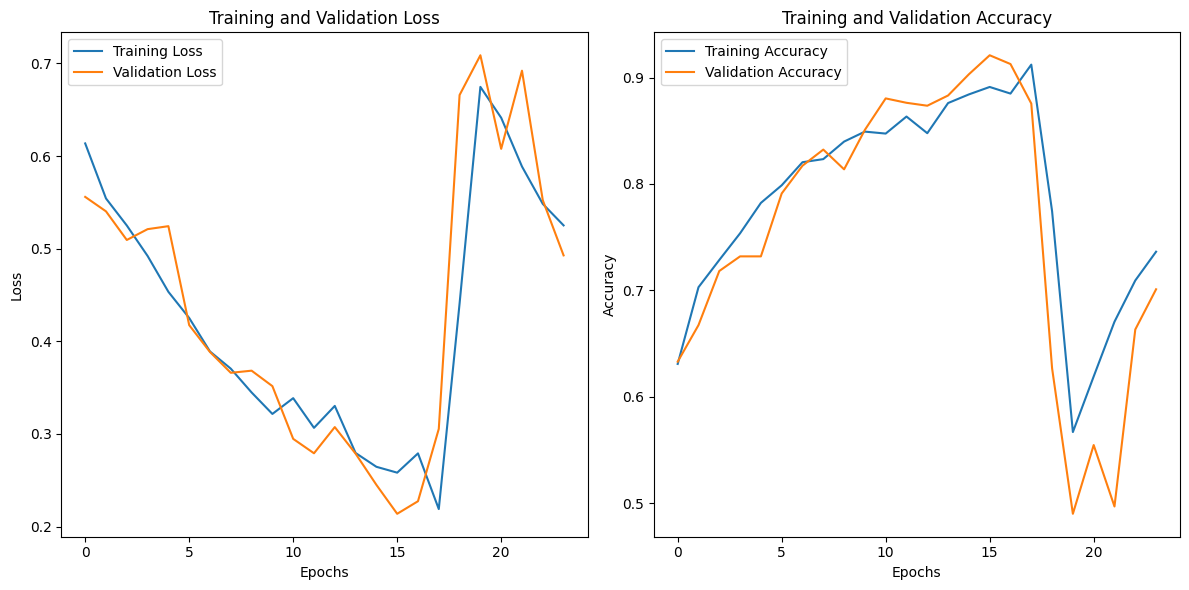

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


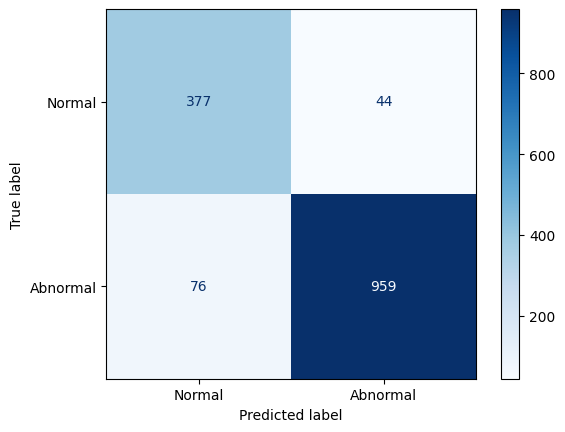

              precision    recall  f1-score   support

      Normal       0.83      0.90      0.86       421
    Abnormal       0.96      0.93      0.94      1035

    accuracy                           0.92      1456
   macro avg       0.89      0.91      0.90      1456
weighted avg       0.92      0.92      0.92      1456



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking_21 (Masking)                 │ (None, 187, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_63 (LSTM)                       │ (None, 187, 64)             │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_64 (LSTM)                       │ (None, 187, 32)             │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_65 (LSTM)                       │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,465 (126.82 KB)

 Trainable params: 32,465 (126.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
262/262 - 9s - 34ms/step - accuracy: 0.6259 - loss: 0.6201 - val_accuracy: 0.5773 - val_loss: 0.6050
Epoch 2/50
262/262 - 11s - 41ms/step - accuracy: 0.6746 - loss: 0.5903 - val_accuracy: 0.5876 - val_loss: 0.6194
Epoch 3/50
262/262 - 5s - 18ms/step - accuracy: 0.6878 - loss: 0.5596 - val_accuracy: 0.4900 - val_loss: 0.6735
Epoch 4/50
262/262 - 5s - 18ms/step - accuracy: 0.7126 - loss: 0.5376 - val_accuracy: 0.6069 - val_loss: 0.5867
Epoch 5/50
262/262 - 6s - 23ms/step - accuracy: 0.7239 - loss: 0.5333 - val_accuracy: 0.7175 - val_loss: 0.5226
Epoch 6/50
262/262 - 5s - 17ms/step - accuracy: 0.7844 - loss: 0.4505 - val_accuracy: 0.7450 - val_loss: 0.5033
Epoch 7/50
262/262 - 6s - 22ms/step - accuracy: 0.8021 - loss: 0.4214 - val_accuracy: 0.8069 - val_loss: 0.4420
Epoch 8/50
262/262 - 10s - 37ms/step - accuracy: 0.8024 - loss: 0.4280 - val_accuracy: 0.7814 - val_loss: 0.4443
Epoch 9/50
262/262 - 6s - 23ms/step - accuracy: 0.8016 - loss: 0.4264 - val_accuracy: 0.7787 - val_los

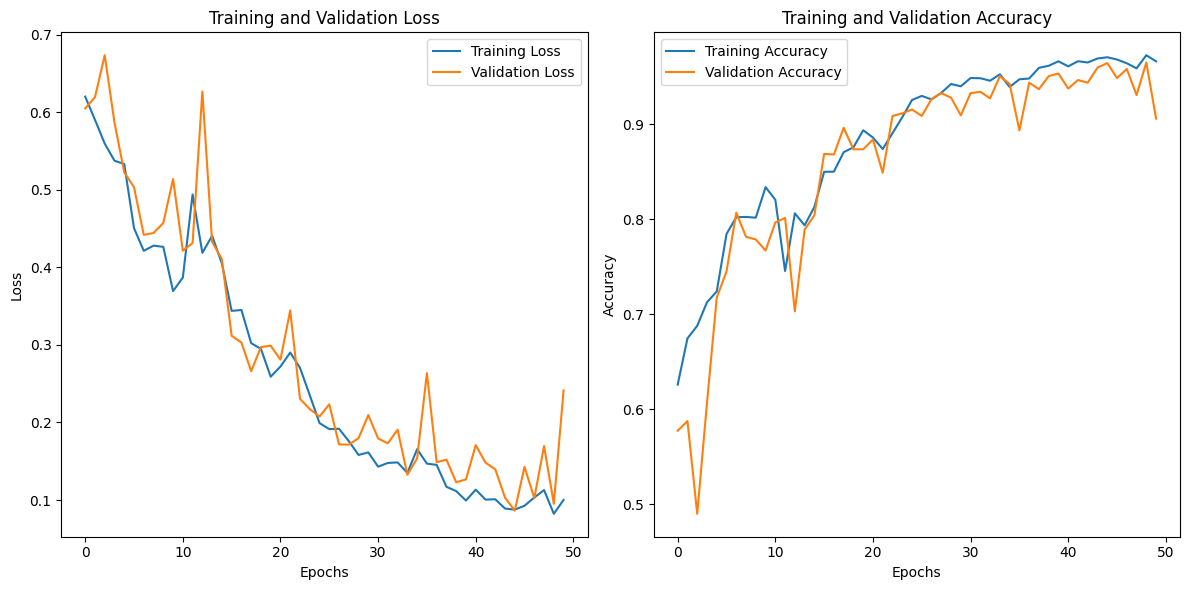

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


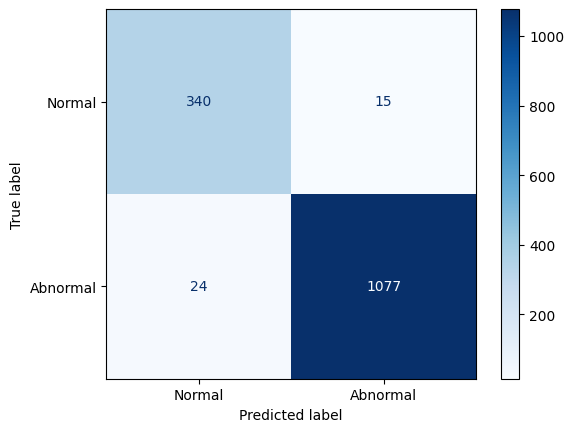

              precision    recall  f1-score   support

      Normal       0.93      0.96      0.95       355
    Abnormal       0.99      0.98      0.98      1101

    accuracy                           0.97      1456
   macro avg       0.96      0.97      0.96      1456
weighted avg       0.97      0.97      0.97      1456



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking_22 (Masking)                 │ (None, 187, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_66 (LSTM)                       │ (None, 187, 64)             │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_67 (LSTM)                       │ (None, 187, 32)             │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_68 (LSTM)                       │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,465 (126.82 KB)

 Trainable params: 32,465 (126.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
263/263 - 9s - 35ms/step - accuracy: 0.6207 - loss: 0.6215 - val_accuracy: 0.6055 - val_loss: 0.5873
Epoch 2/50
263/263 - 5s - 20ms/step - accuracy: 0.6867 - loss: 0.5713 - val_accuracy: 0.7003 - val_loss: 0.5209
Epoch 3/50
263/263 - 11s - 43ms/step - accuracy: 0.7593 - loss: 0.4819 - val_accuracy: 0.7581 - val_loss: 0.4969
Epoch 4/50
263/263 - 9s - 33ms/step - accuracy: 0.7873 - loss: 0.4481 - val_accuracy: 0.8103 - val_loss: 0.4335
Epoch 5/50
263/263 - 6s - 23ms/step - accuracy: 0.8039 - loss: 0.4145 - val_accuracy: 0.8213 - val_loss: 0.3955
Epoch 6/50
263/263 - 9s - 35ms/step - accuracy: 0.8174 - loss: 0.3858 - val_accuracy: 0.8007 - val_loss: 0.4211
Epoch 7/50
263/263 - 6s - 22ms/step - accuracy: 0.8312 - loss: 0.3599 - val_accuracy: 0.8371 - val_loss: 0.3788
Epoch 8/50
263/263 - 10s - 38ms/step - accuracy: 0.8495 - loss: 0.3340 - val_accuracy: 0.8557 - val_loss: 0.3348
Epoch 9/50
263/263 - 10s - 36ms/step - accuracy: 0.8603 - loss: 0.3175 - val_accuracy: 0.8605 - val_lo

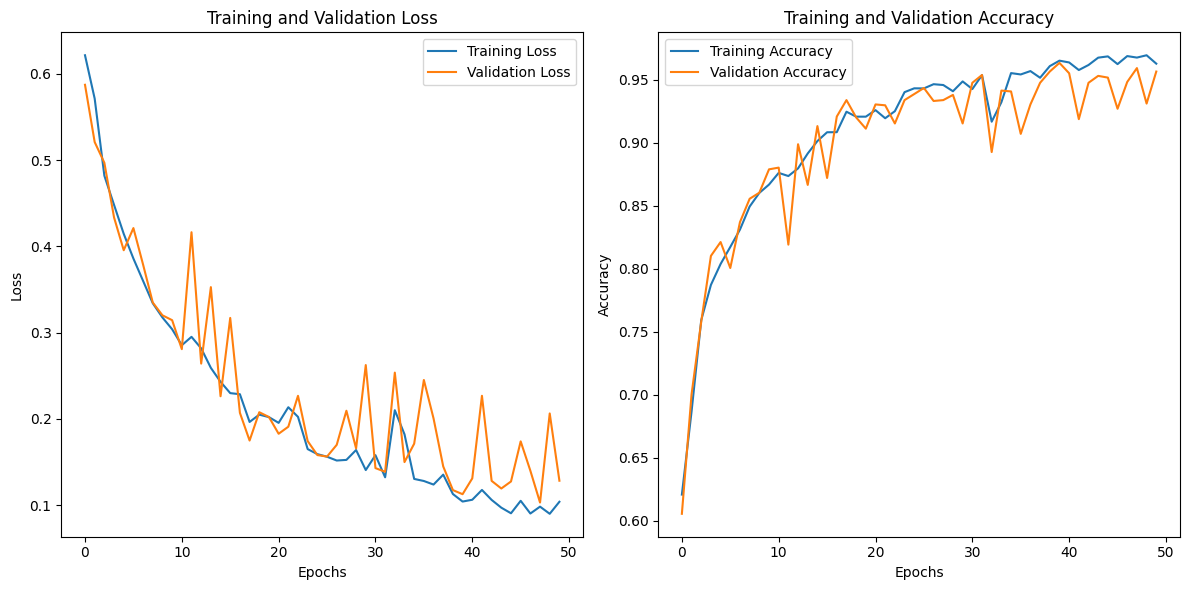

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


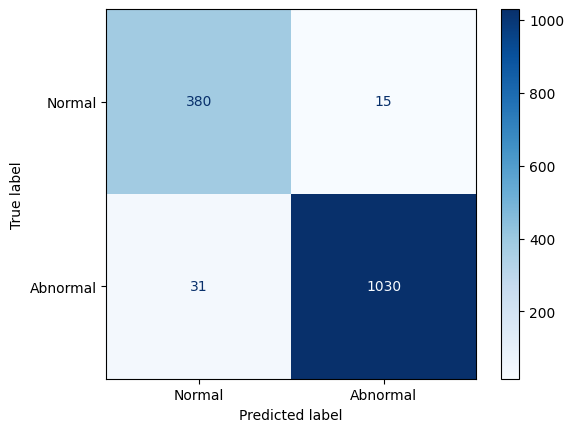

              precision    recall  f1-score   support

      Normal       0.92      0.96      0.94       395
    Abnormal       0.99      0.97      0.98      1061

    accuracy                           0.97      1456
   macro avg       0.96      0.97      0.96      1456
weighted avg       0.97      0.97      0.97      1456



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking_23 (Masking)                 │ (None, 187, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_69 (LSTM)                       │ (None, 187, 64)             │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_70 (LSTM)                       │ (None, 187, 32)             │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_71 (LSTM)                       │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,465 (126.82 KB)

 Trainable params: 32,465 (126.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
264/264 - 9s - 35ms/step - accuracy: 0.6347 - loss: 0.6101 - val_accuracy: 0.6220 - val_loss: 0.5716
Epoch 2/50
264/264 - 10s - 39ms/step - accuracy: 0.7170 - loss: 0.5323 - val_accuracy: 0.7732 - val_loss: 0.4762
Epoch 3/50
264/264 - 5s - 18ms/step - accuracy: 0.7699 - loss: 0.4762 - val_accuracy: 0.7897 - val_loss: 0.4591
Epoch 4/50
264/264 - 5s - 19ms/step - accuracy: 0.7873 - loss: 0.4535 - val_accuracy: 0.7773 - val_loss: 0.4520
Epoch 5/50
264/264 - 6s - 23ms/step - accuracy: 0.7950 - loss: 0.4379 - val_accuracy: 0.7849 - val_loss: 0.4612
Epoch 6/50
264/264 - 9s - 34ms/step - accuracy: 0.8369 - loss: 0.3761 - val_accuracy: 0.8289 - val_loss: 0.3658
Epoch 7/50
264/264 - 6s - 23ms/step - accuracy: 0.8460 - loss: 0.3529 - val_accuracy: 0.8543 - val_loss: 0.3292
Epoch 8/50
264/264 - 10s - 37ms/step - accuracy: 0.8672 - loss: 0.3236 - val_accuracy: 0.8880 - val_loss: 0.2992
Epoch 9/50
264/264 - 10s - 36ms/step - accuracy: 0.8880 - loss: 0.2848 - val_accuracy: 0.8749 - val_lo

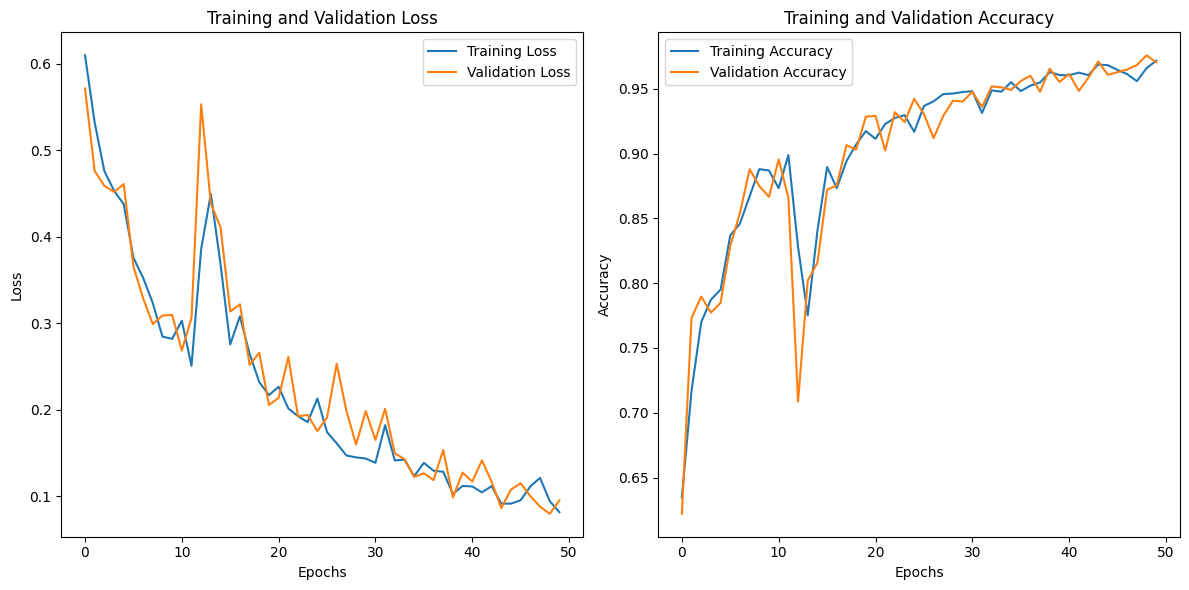

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


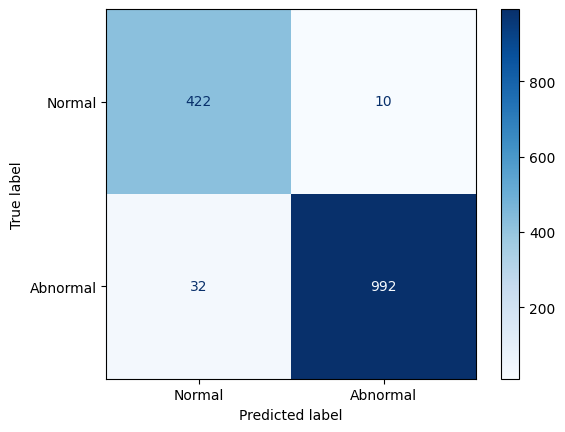

              precision    recall  f1-score   support

      Normal       0.93      0.98      0.95       432
    Abnormal       0.99      0.97      0.98      1024

    accuracy                           0.97      1456
   macro avg       0.96      0.97      0.97      1456
weighted avg       0.97      0.97      0.97      1456



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking_24 (Masking)                 │ (None, 187, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_72 (LSTM)                       │ (None, 187, 64)             │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_73 (LSTM)                       │ (None, 187, 32)             │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_74 (LSTM)                       │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,465 (126.82 KB)

 Trainable params: 32,465 (126.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
265/265 - 9s - 33ms/step - accuracy: 0.6295 - loss: 0.6138 - val_accuracy: 0.5340 - val_loss: 0.6340
Epoch 2/50
265/265 - 6s - 23ms/step - accuracy: 0.7155 - loss: 0.5314 - val_accuracy: 0.7670 - val_loss: 0.4731
Epoch 3/50
265/265 - 5s - 18ms/step - accuracy: 0.7716 - loss: 0.4663 - val_accuracy: 0.7863 - val_loss: 0.4832
Epoch 4/50
265/265 - 5s - 19ms/step - accuracy: 0.7878 - loss: 0.4521 - val_accuracy: 0.7292 - val_loss: 0.4887
Epoch 5/50
265/265 - 6s - 23ms/step - accuracy: 0.7904 - loss: 0.4376 - val_accuracy: 0.7918 - val_loss: 0.4444
Epoch 6/50
265/265 - 5s - 18ms/step - accuracy: 0.8052 - loss: 0.4206 - val_accuracy: 0.8296 - val_loss: 0.3867
Epoch 7/50
265/265 - 6s - 23ms/step - accuracy: 0.7913 - loss: 0.4397 - val_accuracy: 0.8048 - val_loss: 0.4096
Epoch 8/50
265/265 - 9s - 35ms/step - accuracy: 0.8193 - loss: 0.3972 - val_accuracy: 0.8247 - val_loss: 0.3827
Epoch 9/50
265/265 - 6s - 24ms/step - accuracy: 0.8252 - loss: 0.3817 - val_accuracy: 0.8330 - val_loss:

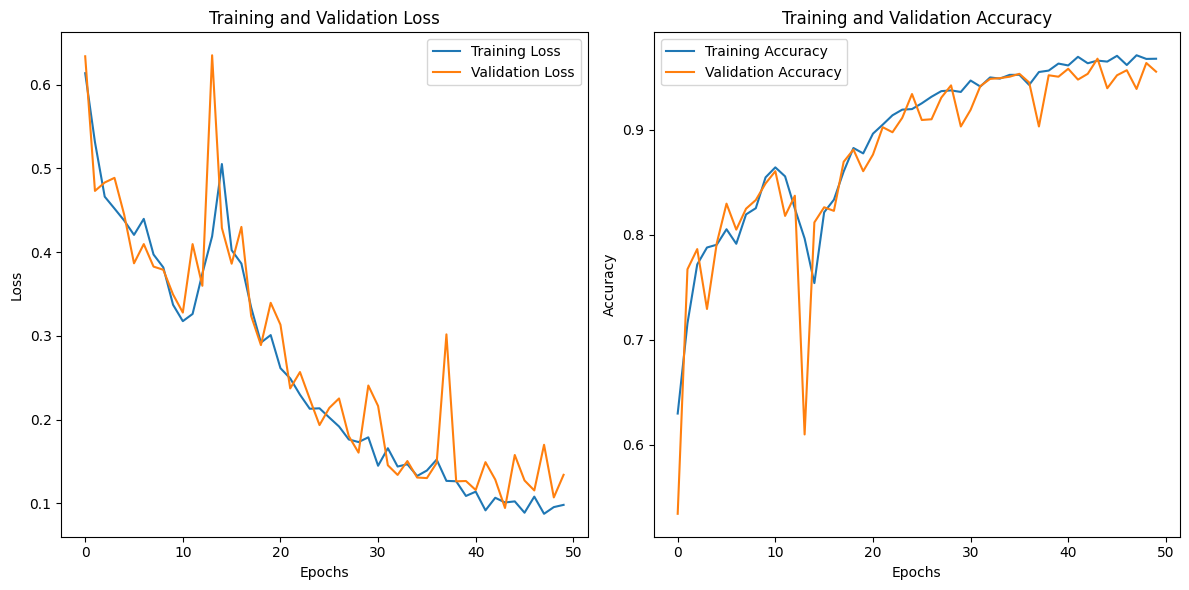

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


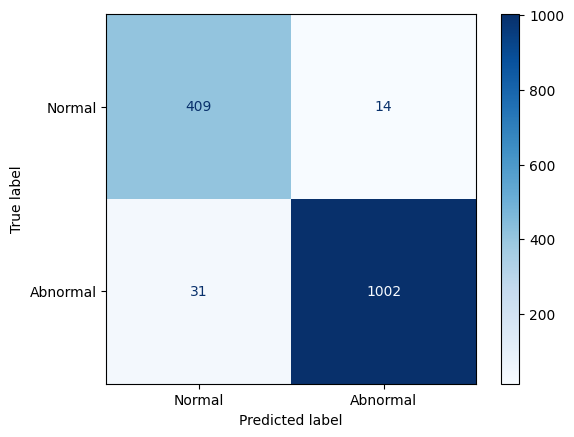

              precision    recall  f1-score   support

      Normal       0.93      0.97      0.95       423
    Abnormal       0.99      0.97      0.98      1033

    accuracy                           0.97      1456
   macro avg       0.96      0.97      0.96      1456
weighted avg       0.97      0.97      0.97      1456



In [ ]:
accs = []
precisions = []
recalls = []
f1s = []

for i in range(5):
  X_train, X_test, X_val, y_train, y_test, y_val = split_data(X, y, i)

  model = create_model()

  model, history = train(model, X_train, X_val, y_train, y_val)

  plot_train_val_process(history)

  acc, precision, recall, f1 = predict(model, X_test)

  accs.append(acc)
  precisions.append(precision)
  recalls.append(recall)
  f1s.append(f1)

In [ ]:
mean_accuracy = np.mean(accs)
std_accuracy = np.std(accs)
mean_precision = np.mean(precisions)
std_precision = np.std(precisions)
mean_recall = np.mean(recalls)
std_recall = np.std(recalls)
mean_f1 = np.mean(f1s)
std_f1 = np.std(f1s)


print(f"\nOverall accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Overall precision: {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Overall recall: {mean_recall:.4f} ± {std_recall:.4f}")
print(f"Overall f1: {mean_f1:.4f} ± {std_f1:.4f}")


Overall accuracy: 0.9599 ± 0.0212
Overall precision: 0.9454 ± 0.0257
Overall recall: 0.9573 ± 0.0232
Overall f1: 0.9511 ± 0.0246
